In [1]:
#imports
from bays_model import BaysModel
from data_manager import DataManager
from doe import DOE
from WoehlerParams import WoehlerCurve
import plot_functions
import matplotlib.pyplot as plt
import numpy as np
#constants
PARAM_LIST = ['k','s_d', 'n_e','one_t_s']

In [2]:
#loading all data from the files
new_data_manager = DataManager()
new_data_manager.load_ki_predictions_from_csv_new(
        filename='ml-prediction.csv', delimiter=',')
#loading the first entry form the ml-prediction entry:
index = 1
ki_predictions = new_data_manager.get_ki_predictions_by_index(index)
#finding the corresponting entry from the database for the experimental data
db_id = new_data_manager.get_db_id_by_index(index)
#loading the data points
n, s_a, outcome = new_data_manager.get_woehler_data_by_db_id(db_id)
curve = WoehlerCurve(s_a, n, outcome)
#the WoehlerParams file uses differnt names for the variables, thus they need to be transformed:
woehler_params_original = new_data_manager.transform_woehler_params(
    curve.Mali_4p_result)

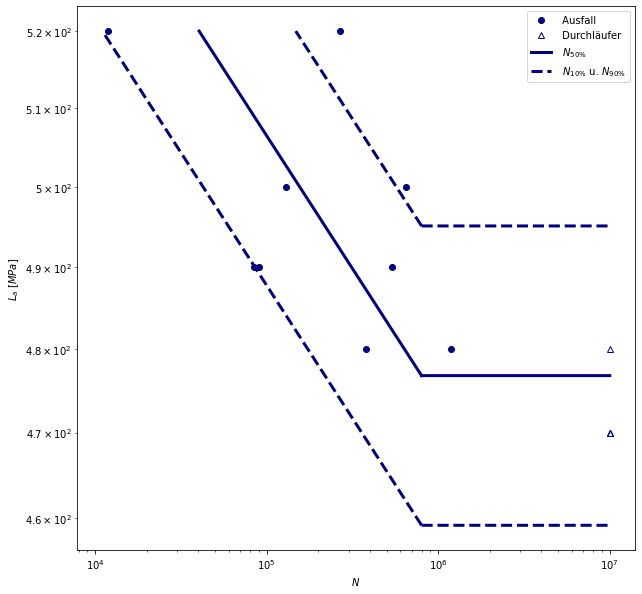

In [3]:
#Plotting the model and the data points
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
woehler_points_original = {}
woehler_points_original['s_a'] = s_a
woehler_points_original['n'] = n
woehler_points_original['outcome'] = outcome
plot_functions.plot_woehler(ax, woehler_points_original)
plot_functions.plot_model(ax, woehler_points_original, woehler_params_original)

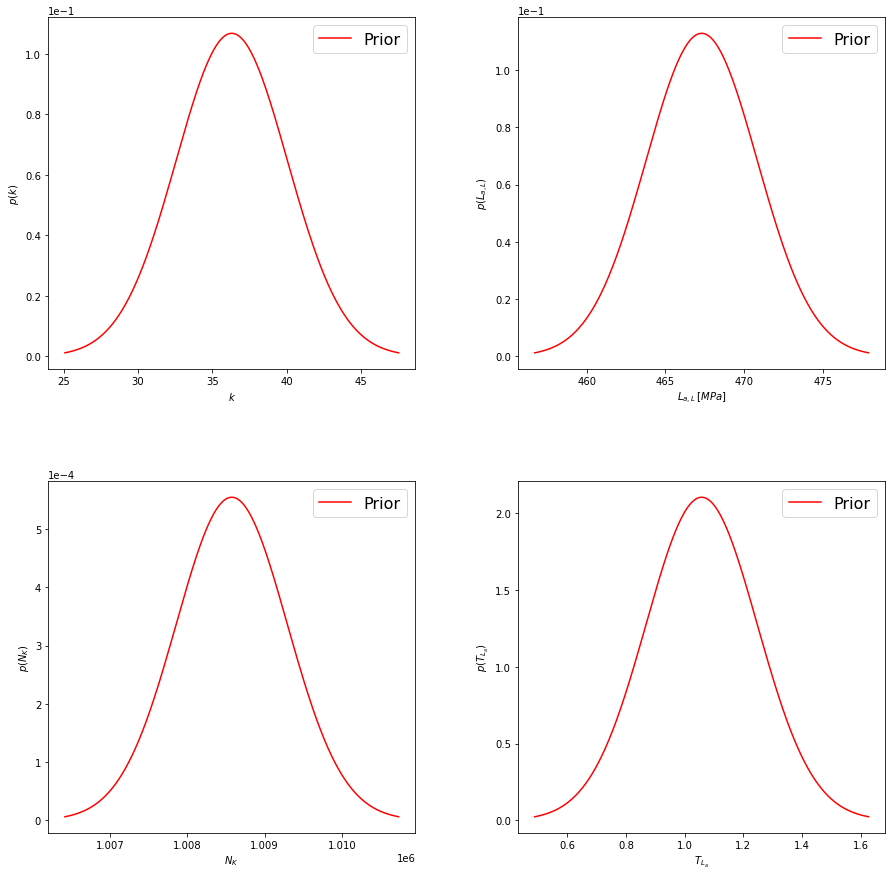

In [4]:
#Plotting the Prior
fig, axes, gs = plot_functions.create_fig_axes()
plot_functions.plot_prior(axes, index)

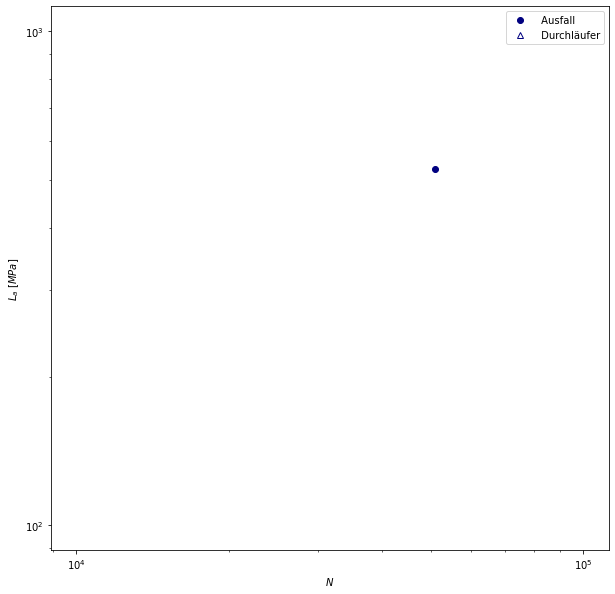

In [5]:
#Planning the first experiment
new_doe = DOE()
#before all experiments no MultiTrace object can be calculated
trace = []

woehler_points = {}
woehler_points['s_a'] = []
woehler_points['n'] = []
woehler_points['outcome'] = []
#defining how accurate the parameters should be calculated.
#For this example a spread (=Streuspanne) of 1 is used. This value is theoretical and can never be achieved.
#Thus, the expermintal planning would continue for ever.
t_enough = {}
for param in PARAM_LIST: t_enough[param] = 1
#getting the next load level:
load_level = new_doe.plan_next_experiment( trace, woehler_points, ki_predictions, t_enough)

outcome, n_sample = new_doe.generate_woehler_point(woehler_params_original, load_level)
woehler_points['n'] = np.append(woehler_points['n'], n_sample)
woehler_points['s_a'] = np.append(woehler_points['s_a'], load_level)
woehler_points['outcome'] = np.append(woehler_points['outcome'], outcome)

#Plotting the result
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
plot_functions.plot_woehler(ax, woehler_points)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [n_e, k, s_d, one_t_s]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 49 seconds.
There were 47 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9194440968398596, but should be close to 0.99. Try to increase the number of tuning steps.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


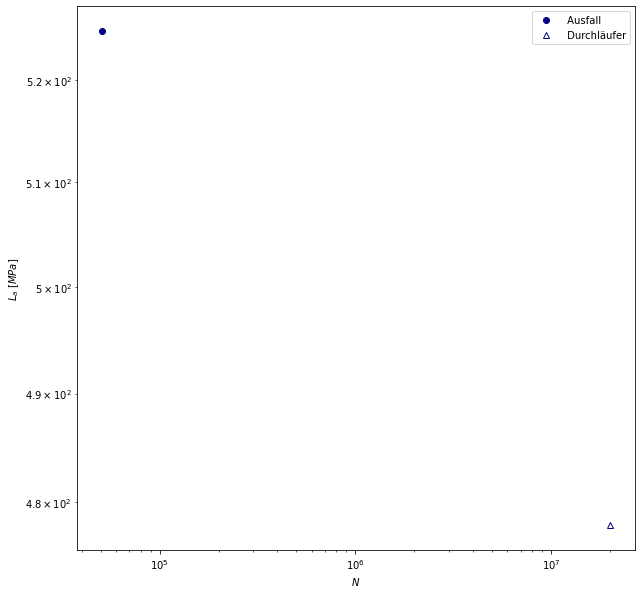

In [6]:
#Planning the second experiment
#The process is very similar to the previous experment.
#However, now the trace object is computed.
new_bays_model = BaysModel()
woehler_params_bayes, trace, prior_distribution = new_bays_model.calc_model(woehler_points)

load_level = new_doe.plan_next_experiment(trace, woehler_points, ki_predictions, t_enough)

outcome, n_sample = new_doe.generate_woehler_point(woehler_params_original, load_level)
woehler_points['n'] = np.append(woehler_points['n'], n_sample)
woehler_points['s_a'] = np.append( woehler_points['s_a'], load_level)
woehler_points['outcome'] = np.append( woehler_points['outcome'], outcome)

#Plotting the result
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
plot_functions.plot_woehler(ax, woehler_points)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [n_e, k, s_d, one_t_s]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 33 seconds.
There were 71 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8800205949948764, but should be close to 0.99. Try to increase the number of tuning steps.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


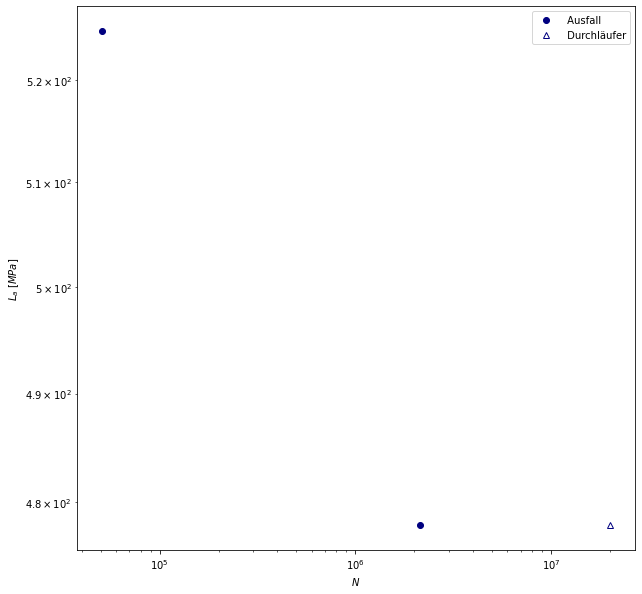

In [7]:
#Planning the third experiment.
#Now, the actuall planning algorithm comes into play, thus the computational time is increased signifficantly
#It might be advantageous to run the code in Spyder or another IDE rather than jupyter-notebook, due to resource allocation.
#A reasonably powerful Computer is recommandet. 
woehler_params_bayes, trace, prior_distribution = new_bays_model.calc_model(woehler_points)

load_level = new_doe.plan_next_experiment(trace, woehler_points, ki_predictions, t_enough)

outcome, n_sample = new_doe.generate_woehler_point(woehler_params_original, load_level)
woehler_points['n'] = np.append(woehler_points['n'], n_sample)
woehler_points['s_a'] = np.append( woehler_points['s_a'], load_level)
woehler_points['outcome'] = np.append( woehler_points['outcome'], outcome)

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
plot_functions.plot_woehler(ax, woehler_points)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [n_e, k, s_d, one_t_s]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 35 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


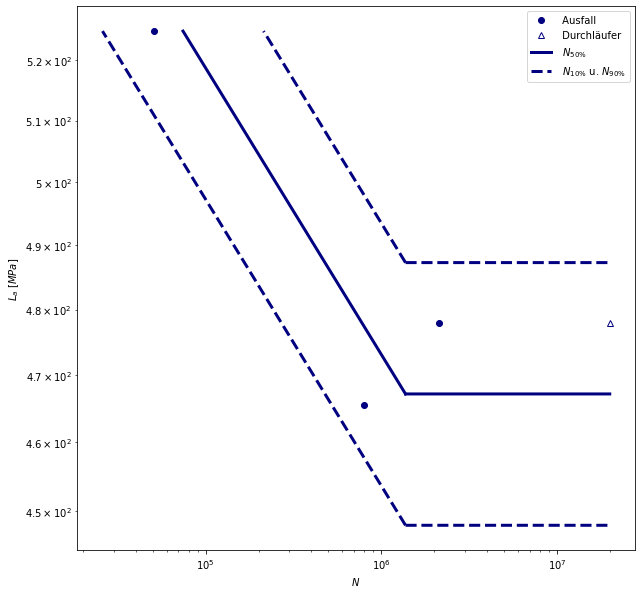

In [8]:
woehler_params_bayes, trace, prior_distribution = new_bays_model.calc_model(woehler_points)

load_level = new_doe.plan_next_experiment(trace, woehler_points, ki_predictions, t_enough)

outcome, n_sample = new_doe.generate_woehler_point(woehler_params_original, load_level)
woehler_points['n'] = np.append(woehler_points['n'], n_sample)
woehler_points['s_a'] = np.append( woehler_points['s_a'], load_level)
woehler_points['outcome'] = np.append( woehler_points['outcome'], outcome)

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
plot_functions.plot_woehler(ax, woehler_points)

n = woehler_points['n']
s_a = woehler_points['s_a']
outcome = woehler_points['outcome']

curve = WoehlerCurve(s_a, n, outcome)
woehler_params = new_data_manager.transform_woehler_params(
    curve.Mali_4p_result)
plot_functions.plot_model(ax, woehler_points, woehler_params)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [n_e, k, s_d, one_t_s]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 43 seconds.
The number of effective samples is smaller than 25% for some parameters.


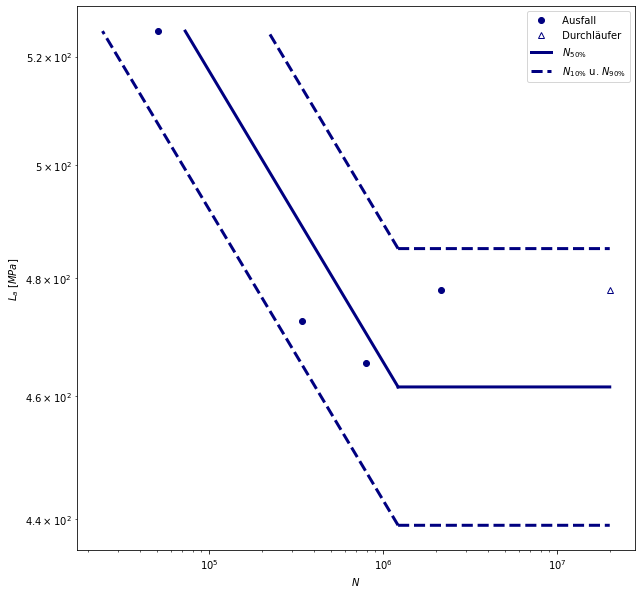

In [9]:
woehler_params_bayes, trace, prior_distribution = new_bays_model.calc_model(woehler_points)

load_level = new_doe.plan_next_experiment(trace, woehler_points, ki_predictions, t_enough)

outcome, n_sample = new_doe.generate_woehler_point(woehler_params_original, load_level)
woehler_points['n'] = np.append(woehler_points['n'], n_sample)
woehler_points['s_a'] = np.append( woehler_points['s_a'], load_level)
woehler_points['outcome'] = np.append( woehler_points['outcome'], outcome)

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
plot_functions.plot_woehler(ax, woehler_points)

n = woehler_points['n']
s_a = woehler_points['s_a']
outcome = woehler_points['outcome']

curve = WoehlerCurve(s_a, n, outcome)
woehler_params = new_data_manager.transform_woehler_params(
    curve.Mali_4p_result)
plot_functions.plot_model(ax, woehler_points, woehler_params)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [n_e, k, s_d, one_t_s]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 44 seconds.
The number of effective samples is smaller than 25% for some parameters.


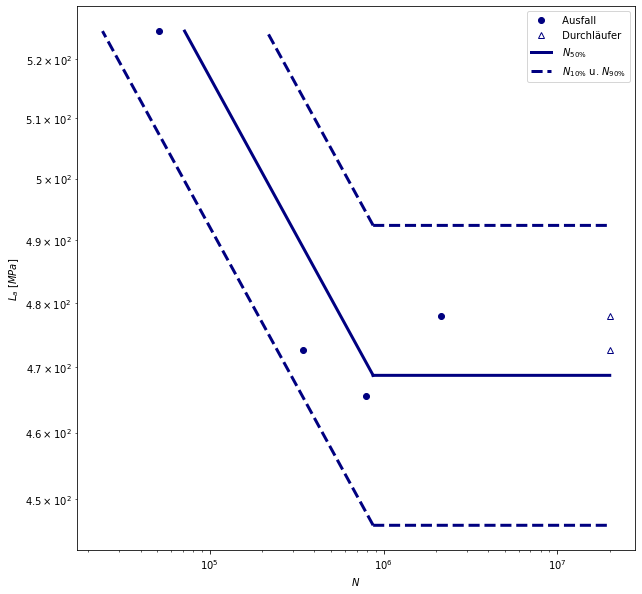

In [10]:
woehler_params_bayes, trace, prior_distribution = new_bays_model.calc_model(woehler_points)

load_level = new_doe.plan_next_experiment(trace, woehler_points, ki_predictions, t_enough)

outcome, n_sample = new_doe.generate_woehler_point(woehler_params_original, load_level)
woehler_points['n'] = np.append(woehler_points['n'], n_sample)
woehler_points['s_a'] = np.append( woehler_points['s_a'], load_level)
woehler_points['outcome'] = np.append( woehler_points['outcome'], outcome)

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
plot_functions.plot_woehler(ax, woehler_points)

n = woehler_points['n']
s_a = woehler_points['s_a']
outcome = woehler_points['outcome']

curve = WoehlerCurve(s_a, n, outcome)
woehler_params = new_data_manager.transform_woehler_params(
    curve.Mali_4p_result)
plot_functions.plot_model(ax, woehler_points, woehler_params)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [n_e, k, s_d, one_t_s]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 38 seconds.
The number of effective samples is smaller than 25% for some parameters.


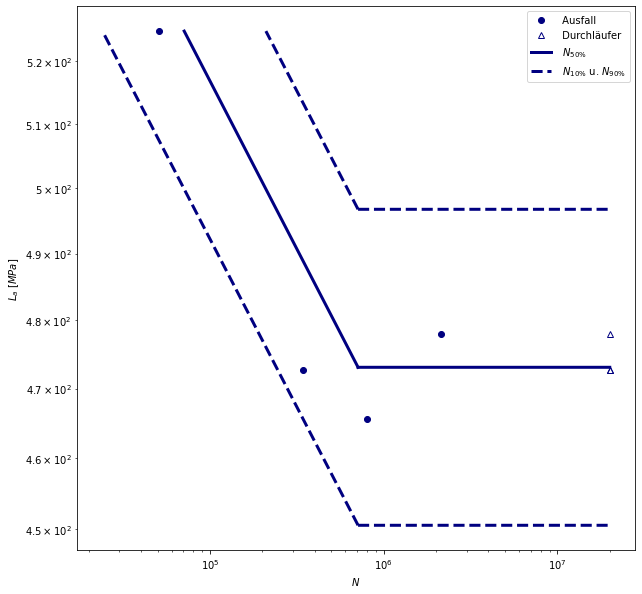

In [11]:
woehler_params_bayes, trace, prior_distribution = new_bays_model.calc_model(woehler_points)

load_level = new_doe.plan_next_experiment(trace, woehler_points, ki_predictions, t_enough)

outcome, n_sample = new_doe.generate_woehler_point(woehler_params_original, load_level)
woehler_points['n'] = np.append(woehler_points['n'], n_sample)
woehler_points['s_a'] = np.append( woehler_points['s_a'], load_level)
woehler_points['outcome'] = np.append( woehler_points['outcome'], outcome)

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
plot_functions.plot_woehler(ax, woehler_points)

n = woehler_points['n']
s_a = woehler_points['s_a']
outcome = woehler_points['outcome']

curve = WoehlerCurve(s_a, n, outcome)
woehler_params = new_data_manager.transform_woehler_params(
    curve.Mali_4p_result)
plot_functions.plot_model(ax, woehler_points, woehler_params)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [n_e, k, s_d, one_t_s]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 36 seconds.
The number of effective samples is smaller than 25% for some parameters.


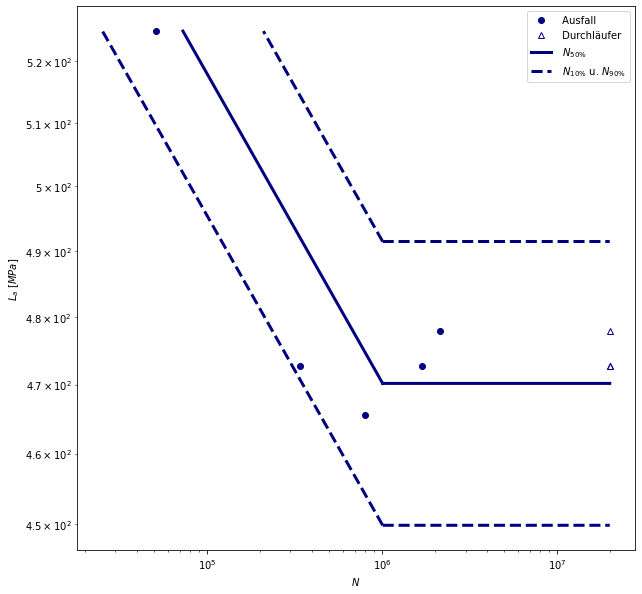

In [12]:
woehler_params_bayes, trace, prior_distribution = new_bays_model.calc_model(woehler_points)

load_level = new_doe.plan_next_experiment(trace, woehler_points, ki_predictions, t_enough)

outcome, n_sample = new_doe.generate_woehler_point(woehler_params_original, load_level)
woehler_points['n'] = np.append(woehler_points['n'], n_sample)
woehler_points['s_a'] = np.append( woehler_points['s_a'], load_level)
woehler_points['outcome'] = np.append( woehler_points['outcome'], outcome)

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
plot_functions.plot_woehler(ax, woehler_points)

n = woehler_points['n']
s_a = woehler_points['s_a']
outcome = woehler_points['outcome']

curve = WoehlerCurve(s_a, n, outcome)
woehler_params = new_data_manager.transform_woehler_params(
    curve.Mali_4p_result)
plot_functions.plot_model(ax, woehler_points, woehler_params)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [n_e, k, s_d, one_t_s]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 40 seconds.
The number of effective samples is smaller than 25% for some parameters.


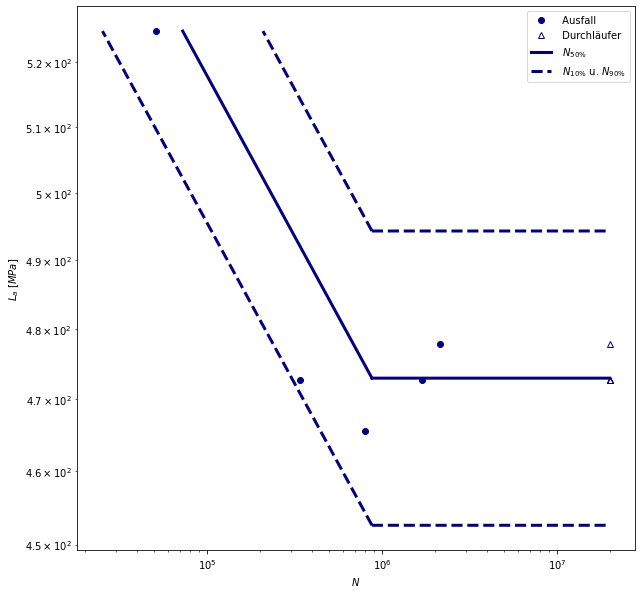

In [13]:
woehler_params_bayes, trace, prior_distribution = new_bays_model.calc_model(woehler_points)

load_level = new_doe.plan_next_experiment(trace, woehler_points, ki_predictions, t_enough)

outcome, n_sample = new_doe.generate_woehler_point(woehler_params_original, load_level)
woehler_points['n'] = np.append(woehler_points['n'], n_sample)
woehler_points['s_a'] = np.append( woehler_points['s_a'], load_level)
woehler_points['outcome'] = np.append( woehler_points['outcome'], outcome)

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
plot_functions.plot_woehler(ax, woehler_points)

n = woehler_points['n']
s_a = woehler_points['s_a']
outcome = woehler_points['outcome']

curve = WoehlerCurve(s_a, n, outcome)
woehler_params = new_data_manager.transform_woehler_params(
    curve.Mali_4p_result)
plot_functions.plot_model(ax, woehler_points, woehler_params)